Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least 3 different blob configurations, then run the 4 methods on each one:

1. K-means
2. mean-shift
3. spectral clustering
4. affinity propagation

In [74]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

# Aesthetics.
%matplotlib inline

In [75]:
# Function to run K-means model.
def runKMeans(): # runKMeans()
    n_clusters = num_clust
    from sklearn.cluster import KMeans
    y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, Y_train))
    
# Function to run mean-shift.
def runMeanShift(): #runMeanShift()
    from sklearn.cluster import MeanShift, estimate_bandwidth
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    print('Number of estimated clusters: {}'.format(n_clusters_))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(Y_train, labels))
    
# Function to run Spectral Clustering.
def runSpectralCluster(): #runSpectralCluster()
    from sklearn.cluster import SpectralClustering
    n_clusters = num_clust
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)
    predict=sc.fit_predict(X_train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(Y_train, predict))
    
# Function to run Affinity Propagation.
def runAffinity():
    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics
    af = AffinityPropagation().fit(X_train)
    print('Done')
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters = len(cluster_centers_indices)
    labels = af.labels_
    print('Esimated number of clusters: {}'.format(n_clusters_))
    from itertools import cycle
    plt.figure(1)
    plt.clf()
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '-')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

# Baseline

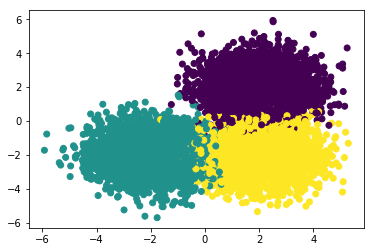

In [76]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with 2 features representing 3 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 3

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

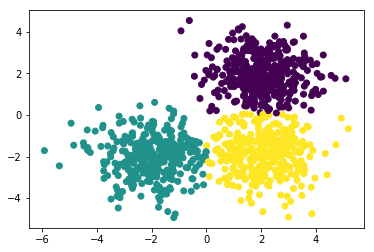

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    1    6
1        0  310    5
2       10    9  307
Number of estimated clusters: 3


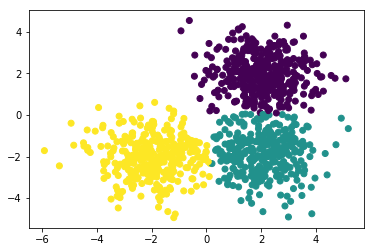

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


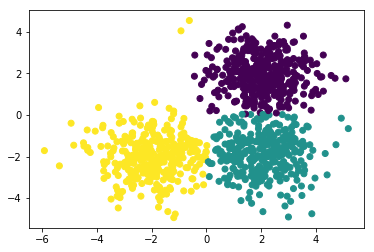

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350   10    2
1        1    9  310
2        7  305    6
Done
Esimated number of clusters: 93


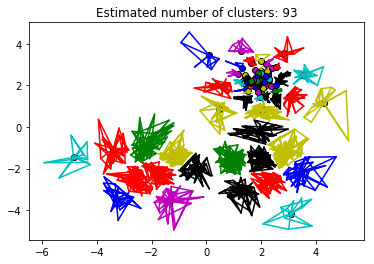

In [77]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 1: More blobs

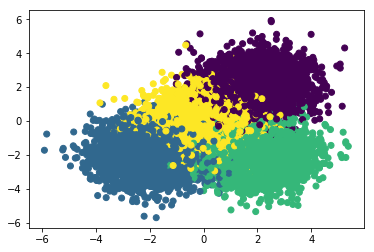

In [78]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [0, 0]]

# Make 10,000 rows worth of data with 2 features representing 4 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 4

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

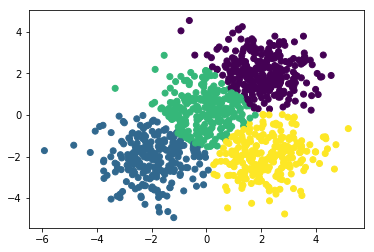

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      247    0    1   14
1        0  214    6   17
2       22   19   15  202
3        4    6  216   17
Number of estimated clusters: 3


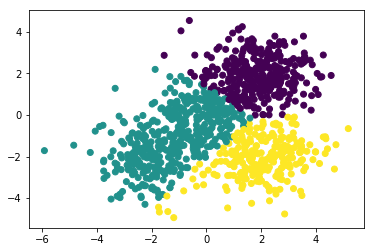

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      265    7    1
1        0  220   19
2        3   21  214
3       46  187   17


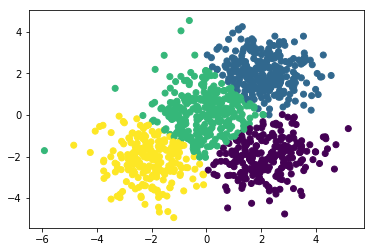

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        1  243   29    0
1        6    0   33  200
2      213    1   23    1
3       15   12  213   10
Done
Esimated number of clusters: 93


IndexError: index 30 is out of bounds for axis 0 with size 30

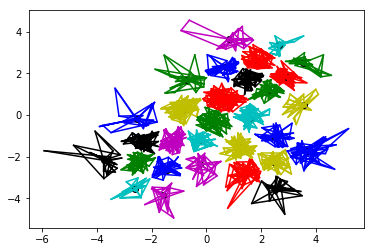

In [79]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 2: Less blobs

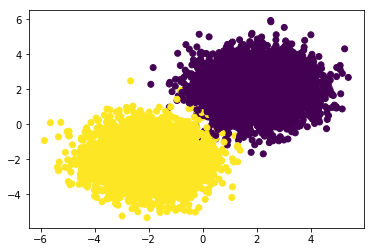

In [80]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with 2 features representing 2 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 2

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

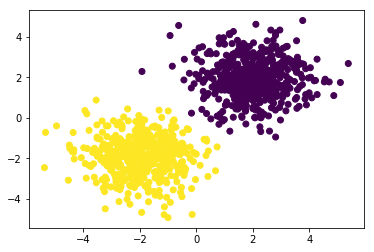

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485
Number of estimated clusters: 2


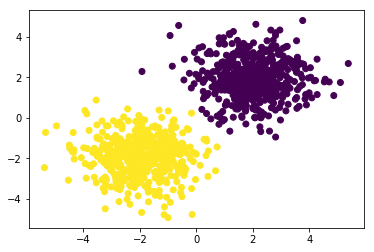

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


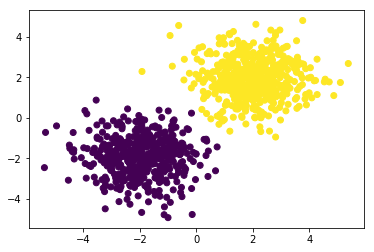

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      486    2
Done
Esimated number of clusters: 93


IndexError: index 27 is out of bounds for axis 0 with size 27

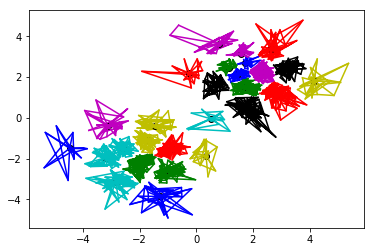

In [81]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 3: More blobs, farther apart

In [ ]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3], [0, 0]]

# Make 10,000 rows worth of data with 2 features representing 4 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 4

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

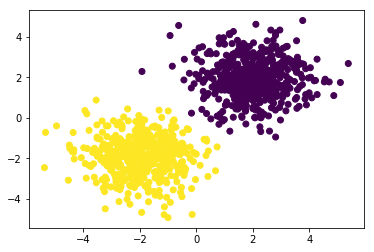

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485
Number of estimated clusters: 2


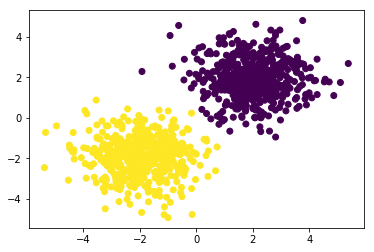

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


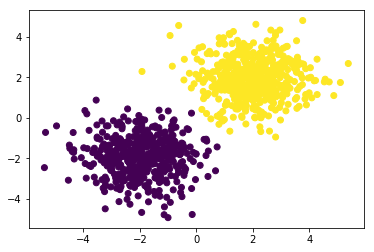

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      486    2
Done
Esimated number of clusters: 93


IndexError: index 27 is out of bounds for axis 0 with size 27

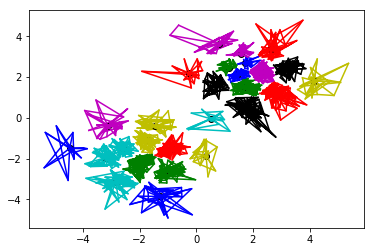

In [82]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 4: Less blobs, farther apart

In [ ]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3]]

# Make 10,000 rows worth of data with 2 features representing 2 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 2

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

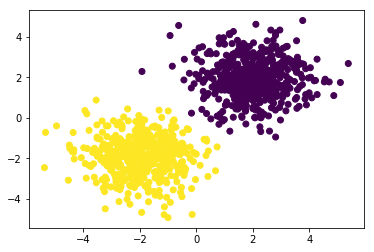

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485
Number of estimated clusters: 2


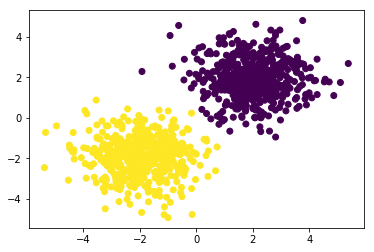

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


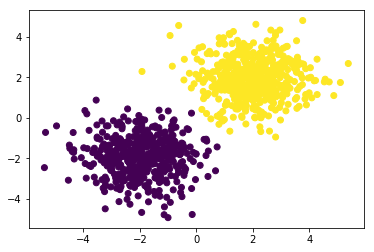

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      486    2
Done
Esimated number of clusters: 93


IndexError: index 27 is out of bounds for axis 0 with size 27

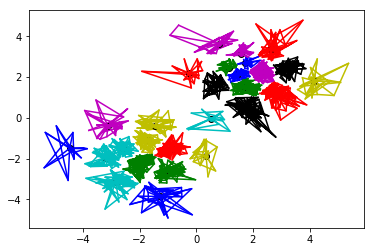

In [83]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 5: More blobs, closer together

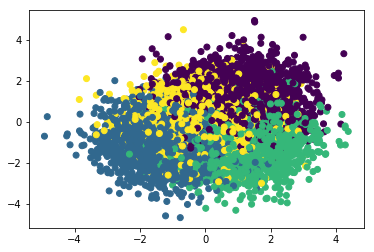

In [84]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [0, 0]]

# Make 10,000 rows worth of data with 2 features representing 4 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 4

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

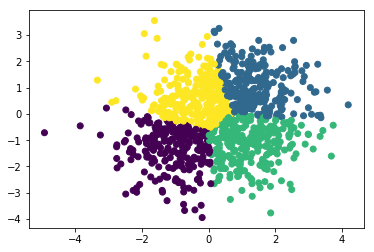

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        4  159   22   39
1      177    1   29   43
2       24   29  169   42
3       68   50   18  126
Number of estimated clusters: 1


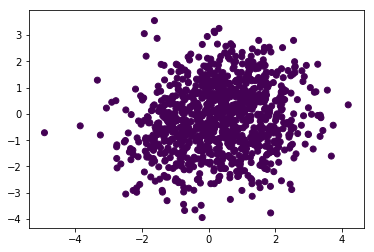

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      273
1      239
2      238
3      250


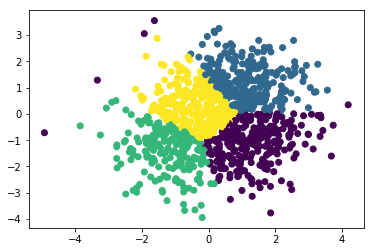

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0       32  187    2   52
1       31    1  140   67
2      171   18   16   33
3       40   56   31  123
Done
Esimated number of clusters: 93


IndexError: index 37 is out of bounds for axis 0 with size 37

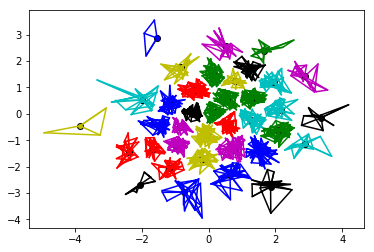

In [85]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

# Config 6: Less blobs, closer together

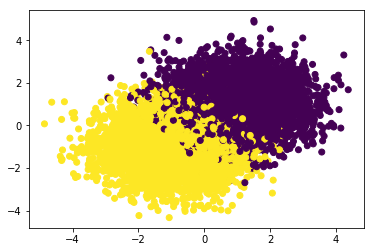

In [86]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1]]

# Make 10,000 rows worth of data with 2 features representing 2 clusters,
# each having a std dev of 1.
X, Y = make_blobs(n_samples = 10000,
                  centers = centers,
                  cluster_std = 1,
                  n_features = 2,
                  random_state = 42)

# Change number of clusters.
num_clust = 2

# Split to train/test.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.9,
                                                    random_state=42)

# View.
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

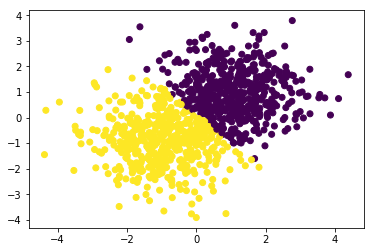

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      466   34
1       46  454
Number of estimated clusters: 2


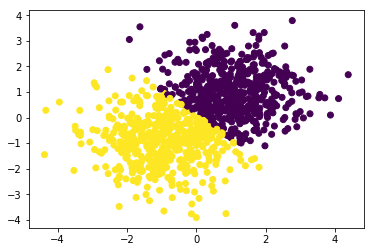

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      465   47
1       35  453


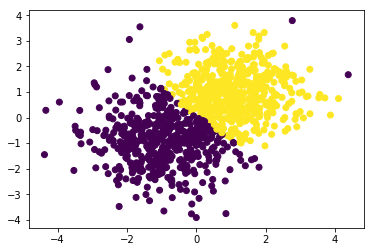

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0       52  460
1      452   36
Done
Esimated number of clusters: 93


IndexError: index 36 is out of bounds for axis 0 with size 36

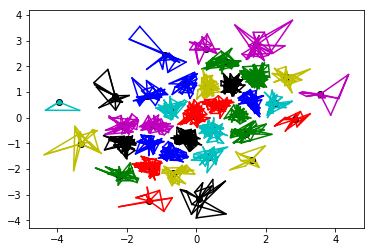

In [87]:
# Output.
runKMeans()
runMeanShift()
runSpectralCluster()
runAffinity()

Accuracy increases as the cluster centers move farther apart. Accuracy will also  increase as the number of centers decreases.